In [4]:
import numpy as np
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt 
from collections import Counter  
import os  
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC


In [5]:
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold,learning_curve,train_test_split

In [6]:
data = pd.read_csv('diabetes.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:

"replace 0 values with median"
data["Glucose"] = data["Glucose"].replace(0,data["Glucose"].median())
data["BloodPressure"] = data["BloodPressure"].replace(0,data["BloodPressure"].median())
data["SkinThickness"] = data["SkinThickness"].replace(0,data["SkinThickness"].median())
data["BMI"] = data["BMI"].replace(0,data["BMI"].median())
data["Insulin"] = data["Insulin"].replace(0,data["Insulin"].median())
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [10]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 1.0, 'Correlation heatmap')

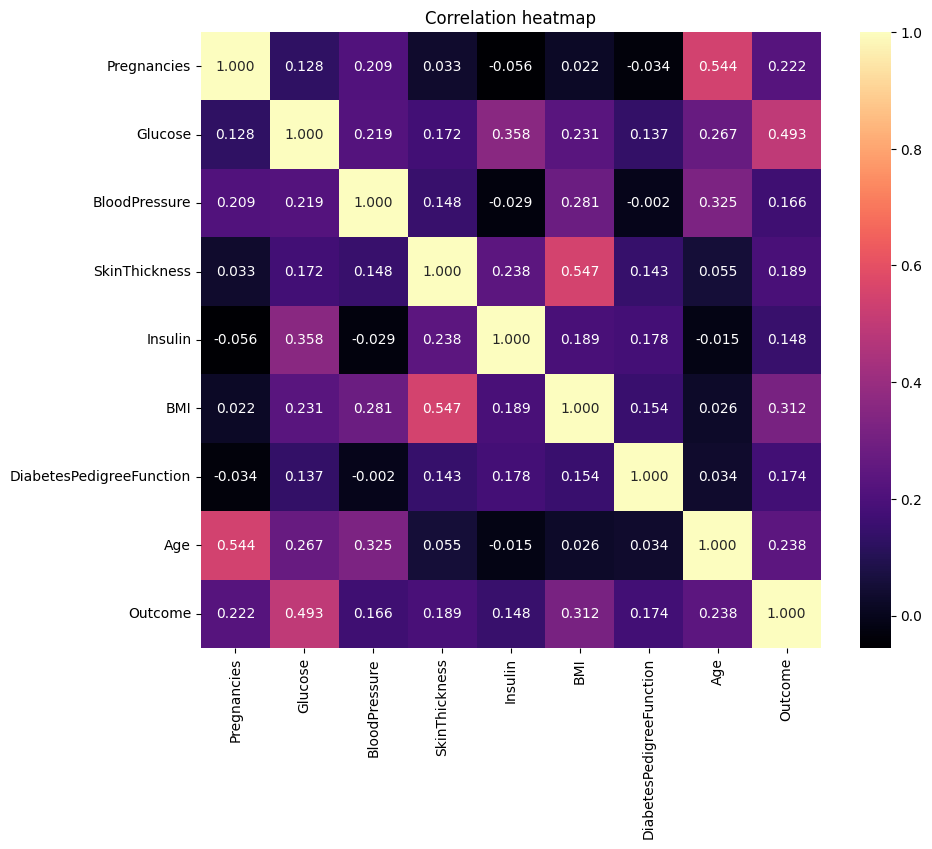

In [11]:
plt.figure(figsize = (10, 8))  
sns.heatmap(data.corr(),annot =True,fmt=".3f",cmap = "magma")
plt.title("Correlation heatmap") 

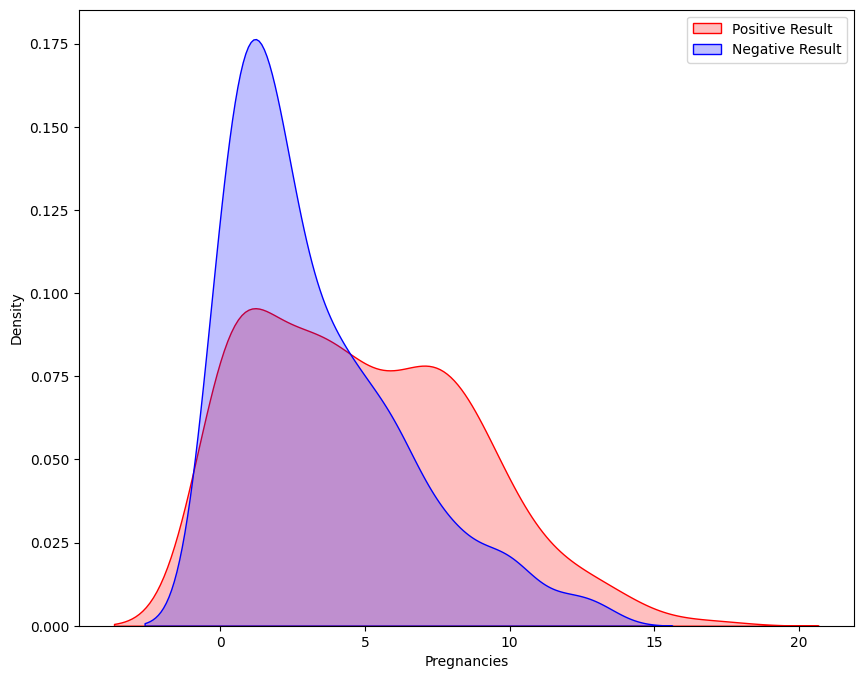

In [12]:
plt.figure(figsize = (10, 8)) 
kde = sns.kdeplot(data["Pregnancies"][data['Outcome']==1],color='Red',fill=True)
kde = sns.kdeplot(data["Pregnancies"][data['Outcome']==0],color='Blue',fill=True)
kde.set_xlabel("Pregnancies")  
kde.set_ylabel("Density")  
kde.legend(["Positive Result", "Negative Result"])  

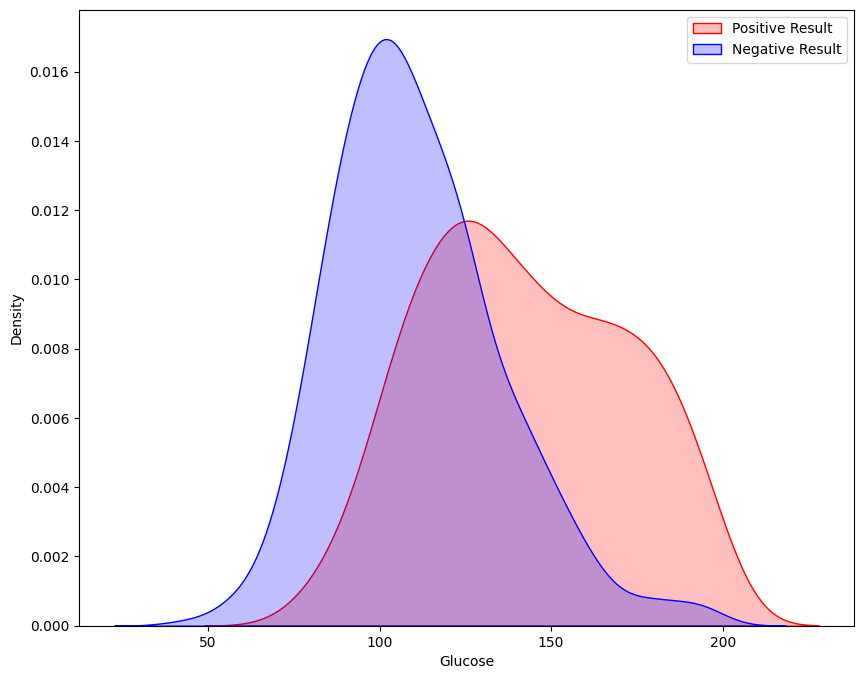

In [13]:
plt.figure(figsize = (10, 8))  
kde = sns.kdeplot(data["Glucose"][data["Outcome"] == 1], color = "Red", fill = True)  
kde = sns.kdeplot(data["Glucose"][data["Outcome"] == 0], ax = kde, color = "Blue", fill= True)  
kde.set_xlabel("Glucose")  
kde.set_ylabel("Density")  
kde.legend(["Positive Result","Negative Result"])  

In [14]:
" convert the skew data into normal distribution"
"  dataset  <-- DataFrame(dataset)  <--  transform(X)  <--  X = fit_transform(data) "
quatile = QuantileTransformer()
X = quatile.fit_transform(data)
dataset = quatile.transform(X)
dataset =  pd.DataFrame(X)



c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


In [15]:
dataset.columns =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'] 


In [16]:
"splitting the data "
X = data.drop(["Outcome"],axis=1)
Y = data["Outcome"]
xtrain,xtest,ytrain,ytest =  train_test_split(X,Y,test_size = 0.20,random_state =10)
print(xtrain.size,'\n',xtest.size)

4912 
 1232


In [23]:
def cv_model(models):
    kfold = StratifiedKFold(n_splits =15)
    r = []
    for m in models:
        r.append(cross_val_score(estimator=m,X=xtrain,y=ytrain,scoring='accuracy',cv = kfold ,n_jobs=4))
    cross_val_means = []
    cross_val_std = []
    for result in r:
        cross_val_means.append(result.mean())
        cross_val_std.append(result.std())
    df_result = pd.DataFrame({
    "CrossValMean":cross_val_means,
    "CrossValStd" : cross_val_std,
    "model list" :[
        "DecisionTreeClassifier",  
            "LogisticRegression",  
            "SVC",  
            "AdaBoostClassifier",  
            "GradientBoostingClassifier",  
            "RandomForestClassifier",  
            "KNeighborsClassifier"  
        
    ] })
    barplot = sns.barplot(x=cross_val_means,y= df_result['model list'].values,data = df_result)
    barplot.set_xlabel("Mean of Cross Validation Accuracy Scores")  
    barplot.set_title("Cross Validation Scores of Models")  
    return df_result  

,CrossValMean,CrossValStd,model list
0,0.708415,0.054801,DecisionTreeClassifier
1,0.772114,0.044688,LogisticRegression
2,0.765488,0.044252,SVC
3,0.688821,0.057292,AdaBoostClassifier
4,0.762236,0.059294,GradientBoostingClassifier
5,0.770447,0.048286,RandomForestClassifier
6,0.724797,0.037973,KNeighborsClassifier


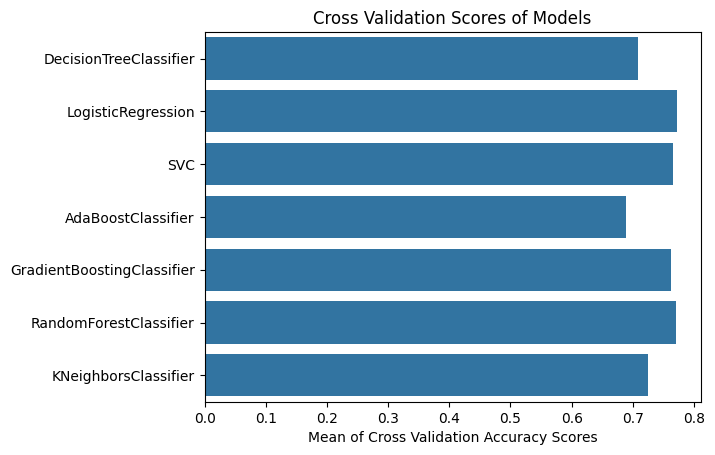

In [24]:
state  =20 

models_list = [  
    DecisionTreeClassifier(random_state = state),  
    LogisticRegression(random_state = state, solver ='liblinear'),  
    SVC(random_state = state),  
    AdaBoostClassifier(DecisionTreeClassifier(random_state = state), random_state = state, learning_rate = 0.3),  
    GradientBoostingClassifier(random_state = state),  
    RandomForestClassifier(random_state = state),  
    KNeighborsClassifier()  
]  
cv_model(models_list)  

In [ ]:
from sklearn.metrics import classification_report  
from sklearn.model_selection import GridSearchCV  

def analyze(grid):
    print('tuned hyperparameters',grid.best_params_)
    print('accuracy_score',grid.best_score_)

    mean_val =  grid.cv_results_[',ea']















  